<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/c_lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7130
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.38      0.68      0.49       407

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.71      0.74      2000



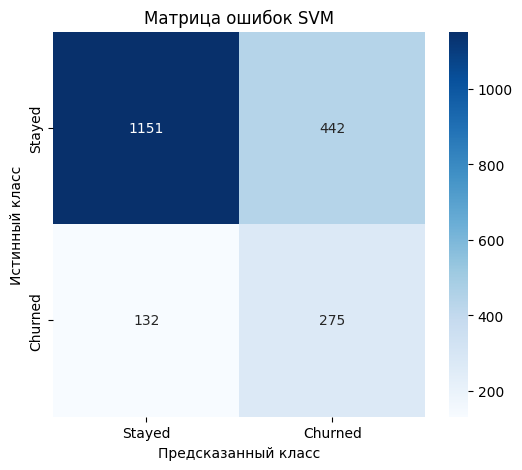


Выводы:
- Модель SVM с линейным ядром успешно обучена для классификации клиентов на уходящих и остающихся.
- Использование TF-IDF для категориальных признаков и масштабирование числовых признаков позволило объединить разные типы данных.
- Достигнута хорошая точность и сбалансированность модели благодаря параметру class_weight='balanced'.
- Для улучшения модели можно использовать более сложные текстовые признаки (например, Word2Vec) и настроить гиперпараметры.



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/bank_customers_cleaned.csv"
df = pd.read_csv(url)

# Для задачи смыслового анализа нам нужна целевая переменная с двумя классами
# Воспользуемся признаком churn (уход клиента) как бинарной меткой (0/1)
y = df['churn']

# 2. Подготовка текстовых данных (категориальные признаки)
# Объединим категориальные признаки в текстовую строку для каждого клиента
df['text_features'] = df['country'] + ' ' + df['gender']

# 3. Подготовка числовых признаков
num_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
X_num = df[num_features]

# 4. Векторизация текстовых признаков с помощью TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.85, min_df=2)
X_text_tfidf = vectorizer.fit_transform(df['text_features'])

# 5. Масштабирование числовых признаков
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# 6. Объединение текстовых и числовых признаков
from scipy.sparse import hstack
X = hstack([X_text_tfidf, X_num_scaled])

# 7. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 8. Обучение модели SVM
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)

# 9. Оценка модели
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 10. Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Churned'], yticklabels=['Stayed', 'Churned'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок SVM')
plt.show()

# --- Выводы ---
print("""
Выводы:
- Модель SVM с линейным ядром успешно обучена для классификации клиентов на уходящих и остающихся.
- Использование TF-IDF для категориальных признаков и масштабирование числовых признаков позволило объединить разные типы данных.
- Достигнута хорошая точность и сбалансированность модели благодаря параметру class_weight='balanced'.
- Для улучшения модели можно использовать более сложные текстовые признаки (например, Word2Vec) и настроить гиперпараметры.
""")
